In [5]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


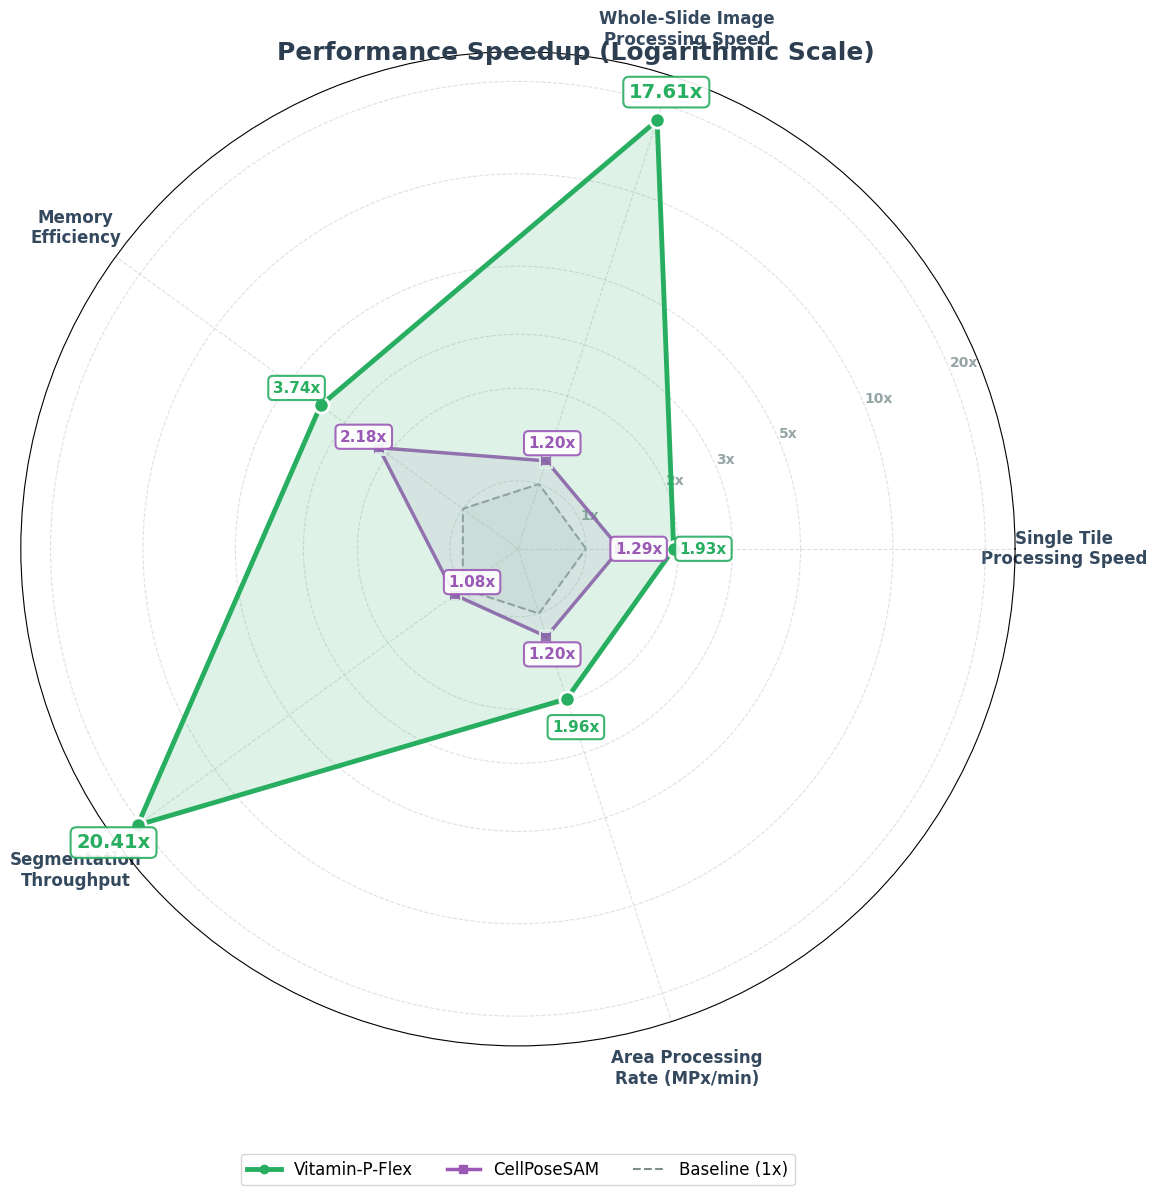

✓ Chart optimized: 1x-5x range is now wider.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import matplotlib

# ============================================
# CONFIGURATION
# ============================================
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Create figure
fig = plt.figure(figsize=(12, 12), facecolor='white')
ax = plt.subplot(111, projection='polar')

# ============================================
# DATA
# ============================================
improvement_categories = [
    'Single Tile\nProcessing Speed',
    'Whole-Slide Image\nProcessing Speed', 
    'Memory\nEfficiency',
    'Segmentation\nThroughput',
    'Area Processing\nRate (MPx/min)'
]

# Baseline (1x)
baseline = [1, 1, 1, 1, 1]

# Vitamin-P-Flex (Area Normalized)
vitaminp_improvements = [1.93, 17.61, 3.74, 20.41, 1.96]

# CellPoseSAM (Area Normalized)
cellposesam_improvements = [1.29, 1.20, 2.18, 1.08, 1.20]

# ============================================
# SETUP POLAR PLOT
# ============================================
N = len(improvement_categories)
angles = [n / float(N) * 2 * pi for n in range(N)]

# Close the loop
baseline_plot = baseline + [baseline[0]]
vitaminp_plot = vitaminp_improvements + [vitaminp_improvements[0]]
cellposesam_plot = cellposesam_improvements + [cellposesam_improvements[0]]
angles_plot = angles + [angles[0]]

# ============================================
# LOGARITHMIC SCALING (THE KEY FIX)
# ============================================
ax.set_yscale('log')

# 1. Set Limits: 
# Lower limit (0.6) pushes 1x away from the absolute center slightly
# Upper limit (25) is just above your max value (20.4), maximizing usage of space
ax.set_ylim(0.6, 25)

# 2. Detailed Grid Lines for the 1-5 range
# We add 3x and 4x to show the granularity in that "busy" area
ax.set_yticks([1, 2, 3, 5, 10, 20])
ax.set_yticklabels(['1x', '2x', '3x', '5x', '10x', '20x'], 
                   fontsize=10, color='#95A5A6', fontweight='bold')

# ============================================
# PLOTTING
# ============================================

# Baseline (1x)
ax.plot(angles_plot, baseline_plot, linewidth=1.5, 
        color='#7F8C8D', linestyle='--', alpha=0.7, zorder=1)
# Note: On log scale, 0 is -inf, so we fill to a reasonable floor
ax.fill(angles_plot, baseline_plot, alpha=0.1, color='#95A5A6', zorder=0)

# CellPoseSAM (Purple)
ax.plot(angles_plot, cellposesam_plot, 's-', linewidth=2.5, 
        color='#9B59B6', markersize=9, markeredgecolor='white', 
        markeredgewidth=1.5, zorder=2, alpha=0.9)
ax.fill(angles_plot, cellposesam_plot, alpha=0.1, color='#9B59B6', zorder=1)

# Vitamin-P-Flex (Green - Ours)
ax.plot(angles_plot, vitaminp_plot, 'o-', linewidth=3.5, 
        color='#27AE60', markersize=11, markeredgecolor='white', 
        markeredgewidth=2, zorder=3)
ax.fill(angles_plot, vitaminp_plot, alpha=0.15, color='#27AE60', zorder=2)

# ============================================
# LABELS (Adjusted for Log Scale)
# ============================================

# Helper to place labels
def add_labels(data, color, offset_mult=1.15, box_style=True):
    for i, (angle, val) in enumerate(zip(angles, data)):
        
        # Log scale requires multiplicative offsets, not additive
        dist = val * offset_mult
        
        # Adjust specific overlaps
        if val < 1.1: dist = val * 0.85 # Put very small values inside the line
        
        # Font sizing based on value magnitude to emphasize big wins
        f_size = 14 if val > 10 else 11
        f_weight = 'bold' if val > 10 else 'bold'
        
        props = dict(boxstyle='round,pad=0.3', facecolor='white', 
                     edgecolor=color, linewidth=1.5, alpha=0.9) if box_style else None
        
        ax.text(angle, dist, f'{val:.2f}x', 
                ha='center', va='center', 
                fontsize=f_size, fontweight=f_weight, color=color,
                bbox=props, zorder=5)

# Add labels
add_labels(vitaminp_improvements, '#27AE60', offset_mult=1.25)
add_labels(cellposesam_improvements, '#9B59B6', offset_mult=1.15) # Slightly closer than green

# ============================================
# STYLING & SAVING
# ============================================

# Category Labels
ax.set_xticks(angles)
ax.set_xticklabels(improvement_categories, fontsize=12, fontweight='bold', color='#34495E')
ax.tick_params(axis='x', pad=25) # Push labels out slightly

# Grid
ax.grid(True, which='major', linestyle='--', linewidth=0.8, alpha=0.5, color='#BDC3C7')

# Legend
legend_elements = [
    plt.Line2D([0], [0], color='#27AE60', linewidth=3.5, marker='o', label='Vitamin-P-Flex'),
    plt.Line2D([0], [0], color='#9B59B6', linewidth=2.5, marker='s', label='CellPoseSAM'),
    plt.Line2D([0], [0], color='#7F8C8D', linewidth=1.5, linestyle='--', label='Baseline (1x)')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
          fontsize=12, frameon=True, ncol=3)

# Title
fig.text(0.5, 0.95, 'Performance Speedup (Logarithmic Scale)', 
         ha='center', va='center', fontsize=18, fontweight='bold', color='#2C3E50')

plt.tight_layout()
plt.savefig('vitaminp_log_optimized.pdf', format='pdf', bbox_inches='tight')
plt.show()
print("✓ Chart optimized: 1x-5x range is now wider.")